<a href="https://colab.research.google.com/github/CriptoQuant/Qiskit/blob/main/QPE.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install qiskit ipywidgets
!pip install pylatexenc
!pip install matplotlib
!pip install qiskit-aer

In [3]:

from qiskit import QuantumCircuit, transpile
from qiskit.visualization import *
from qiskit import *
from qiskit_aer import Aer
import numpy as np
from qiskit.visualization import plot_histogram
from qiskit.circuit.library import UnitaryGate
from qiskit.circuit.library import QFT
import math

In [33]:
n=4
qc = QuantumCircuit(n,n-1)


# Qubit objetivo del que queremos medir la fase
qc.x(3)
qc.barrier()

#Aplicar las puertas H a los qubits
for i in range (n-1):
  qc.h(i)

qc.barrier()

# Aplicar fase del operador unitario U que aplica una rotación
#con respecto al eje Z de π/9 al estado |1>: U|1>=e^{iπ/9}|1>
repeticiones = 1
for i in range(n-1):
    for j in range(repeticiones):
        qc.cp(math.pi/(9/2), i, n-1); # controlled-T
    repeticiones *= 2
qc.barrier()

# Aplicar QFT inversa
qc = qc.compose(QFT(n-1, inverse = True), list(range(n-1)))
qc.barrier()

# Mediciones
for i in range (n-1):
  qc.measure(i,i)


Resultados: {'110': 2, '101': 4, '111': 3, '011': 2, '100': 3, '010': 4, '000': 11, '001': 995}


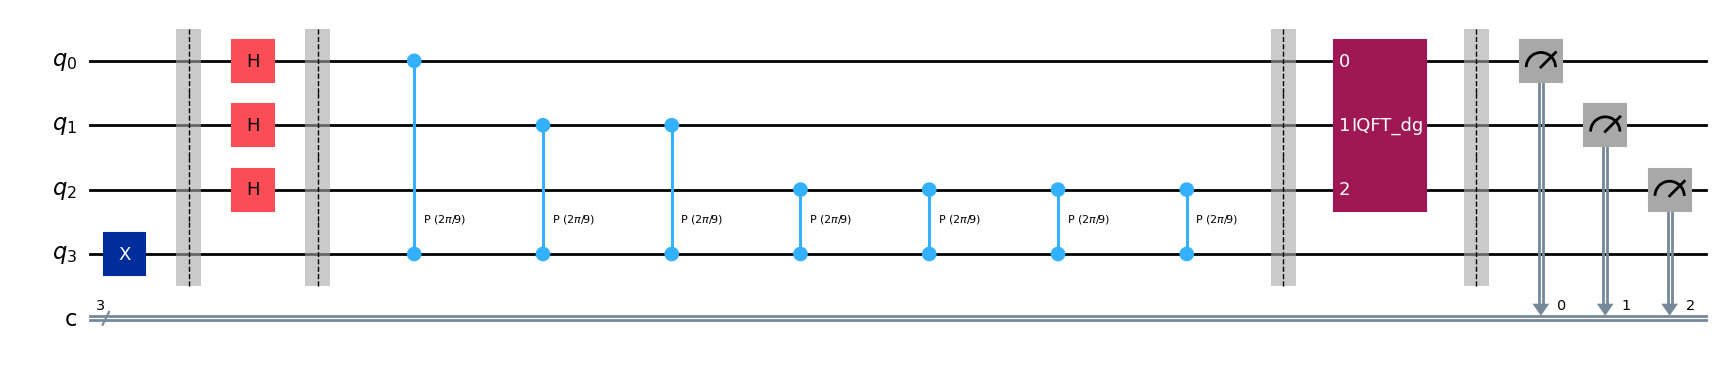

In [31]:
sim = Aer.get_backend('qasm_simulator')

my_circuit = transpile(qc, sim)
job1 = sim.run(my_circuit)

result = job1.result()
counts = result.get_counts()
print("Resultados:", counts)

# Dibujar el circuito
qc.draw('mpl')

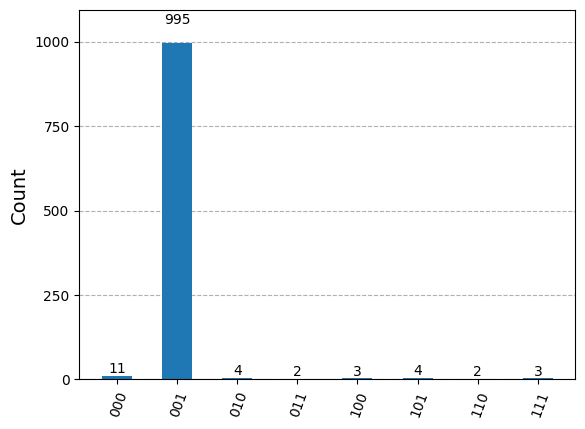

In [32]:
plot_histogram(counts)

In [26]:
max_key = max(counts, key=counts.get)  # Find the key with the maximum value
print("Resultado:",max_key)
print("Objetivo: (1/9) = ", 1/9)

# 1/2^n / n= numero de qubits usados
print ("Comparación con 1/2^3 qubits:", 1/2**(n-1))


Resultado: 001
Objetivo: (1/9) =  0.1111111111111111
Comparación con 1/2^3 qubits: 0.125
